This experiment was designed to examine the assymitry in the response of the left and right wing to wide field motion presented to a hemifield. The hypotheisis is that the billateral differences in stroke amplitude will be larger with roll-type stimuli than yaw.

The rational for this hypothesis stems from the observation that the flies during im seem to produce anti-correlated changes in wingstroke amplitude during stripe fixation (a yaw type stimulus) but respond to roll with correlated changes in wingstroke amplitude.This experiment tests yaw vs roll in a more equivilent way.

In [1]:
import flylib
import db_access as dba
fly_db = dba.get_db()

IOError: Unable to create file (Unable to open file: name = '/media/flydatac/flydb/fly0182/fly_record.hdf5', errno = 17, error message = 'file exists', flags = 15, o_flags = c2)

In [2]:
test_group = [200,201,202,203,204,205,206,207]
swarm = flylib.Squadron(fly_db,test_group)

In [3]:
def extract_wing_data(fly,plot_fly = True):
    
    roll_90 = {'left':list(),'right':list(),'lmr':list()}
    roll_270 = {'left':list(),'right':list(),'lmr':list()} 
    yaw_90 = {'left':list(),'right':list(),'lmr':list()} 
    yaw_270 = {'left':list(),'right':list(),'lmr':list()} 
    
    exp = fly.experiments['img_pattern_test_t2_lightoff']
    sequences = exp.exp_record['sequences'].values()
    
    left = np.array(exp.exp_record['axon_data']['Ph0'])
    right = np.array(exp.exp_record['axon_data']['Ph1'])
    lmr = np.array(exp.exp_record['axon_data']['Ph2'])
    
    sig = lmr
    #get some global stuff
    ep0 = np.array(sequences[0]['epoch'])
    times = np.array(exp.exp_record['axon_data']['times'])[ep0]
    times -= times[0]
    dt = times[1]
    num_samples = around(3.0/dt) # 3 sec of data
    ep_start = np.array(sequences[0]['epoch'])[0]
    ep_slice = slice(ep_start,ep_start+num_samples)
    times = np.array(exp.exp_record['axon_data']['times'])[ep_slice]
    times -= times[0]
    stim = np.array(exp.exp_record['axon_data']['Ypos'])[ep_slice]
    if plot_fly:subplot(3,1,1)
    if plot_fly:plot(times,stim)
    for seq in sequences:
        if seq['epoch_name'].value == 'static_test_roll_90.mat':
            if plot_fly:subplot(3,1,2)

            ep_start = np.array(seq['epoch'])[0]
            ep_slice = slice(ep_start,ep_start+num_samples)
            roll_90['left'].append(left[ep_slice])
            roll_90['right'].append(right[ep_slice])
            roll_90['lmr'].append(lmr[ep_slice])

            if plot_fly:plot(times,sig[ep_slice],color = 'r',alpha = 0.5)
        if seq['epoch_name'].value == 'static_test_roll_270.mat':
            if plot_fly:subplot(3,1,2)

            ep_start = np.array(seq['epoch'])[0]
            ep_slice = slice(ep_start,ep_start+num_samples)
            roll_270['left'].append(left[ep_slice])
            roll_270['right'].append(right[ep_slice])
            roll_270['lmr'].append(lmr[ep_slice])
            
            if plot_fly:plot(times,sig[ep_slice],color = 'b',alpha = 0.5)
        if seq['epoch_name'].value == 'static_test_yaw_90.mat':
            if plot_fly:subplot(3,1,3)

            ep_start = np.array(seq['epoch'])[0]
            ep_slice = slice(ep_start,ep_start+num_samples)
            yaw_90['left'].append(left[ep_slice])
            yaw_90['right'].append(right[ep_slice])
            yaw_90['lmr'].append(lmr[ep_slice])
            
            if plot_fly:plot(times,sig[ep_slice],color = 'r',alpha = 0.5)
        if seq['epoch_name'].value == 'static_test_yaw_270.mat':
            if plot_fly:subplot(3,1,3)

            ep_start = np.array(seq['epoch'])[0]
            ep_slice = slice(ep_start,ep_start+num_samples)
            yaw_270['left'].append(left[ep_slice])
            yaw_270['right'].append(right[ep_slice])
            yaw_270['lmr'].append(lmr[ep_slice])
            
            times = np.array(exp.exp_record['axon_data']['times'])[ep_slice]
            times -= times[0]
            if plot_fly:plot(times,sig[ep_slice],color = 'b',alpha = 0.5)
    for siglist in [roll_90,roll_270,yaw_90,yaw_270]:
        for key in siglist.keys():
            siglist[key] = np.array(siglist[key])
    return {'roll_90':roll_90,'roll_270':roll_270,'yaw_90':yaw_90,'yaw_270':yaw_270}

In [4]:
flymeta = list()
group_dict_means = {'yaw_90_left':list(),'yaw_270_left':list(),
                    'roll_90_left':list(),'roll_270_left':list(),
                    'yaw_90_right':list(),'yaw_270_right':list(),
                    'roll_90_right':list(),'roll_270_right':list()}
for fly in swarm.flies:
    print fly.fly_num
    rdict = extract_wing_data(fly,plot_fly = False)
    group_dict_means['yaw_90_left'].append(np.mean(rdict['yaw_90']['left'],axis = 0))
    group_dict_means['yaw_270_left'].append(np.mean(rdict['yaw_270']['left'],axis = 0))
    group_dict_means['roll_90_left'].append(np.mean(rdict['roll_90']['left'],axis = 0))
    group_dict_means['roll_270_left'].append(np.mean(rdict['roll_270']['left'],axis = 0))
    ####
    group_dict_means['yaw_90_right'].append(np.mean(rdict['yaw_90']['right'],axis = 0))
    group_dict_means['yaw_270_right'].append(np.mean(rdict['yaw_270']['right'],axis = 0))
    group_dict_means['roll_90_right'].append(np.mean(rdict['roll_90']['right'],axis = 0))
    group_dict_means['roll_270_right'].append(np.mean(rdict['roll_270']['right'],axis = 0))

200
201
202
203
204
205
206
207


In [8]:
#f = open('./group_metadata/pitch_yaw_aperture_analysis_group_dict_means.cpkl','wb')
#import cPickle
#cPickle.dump(group_dict_means,f)
#f.close()

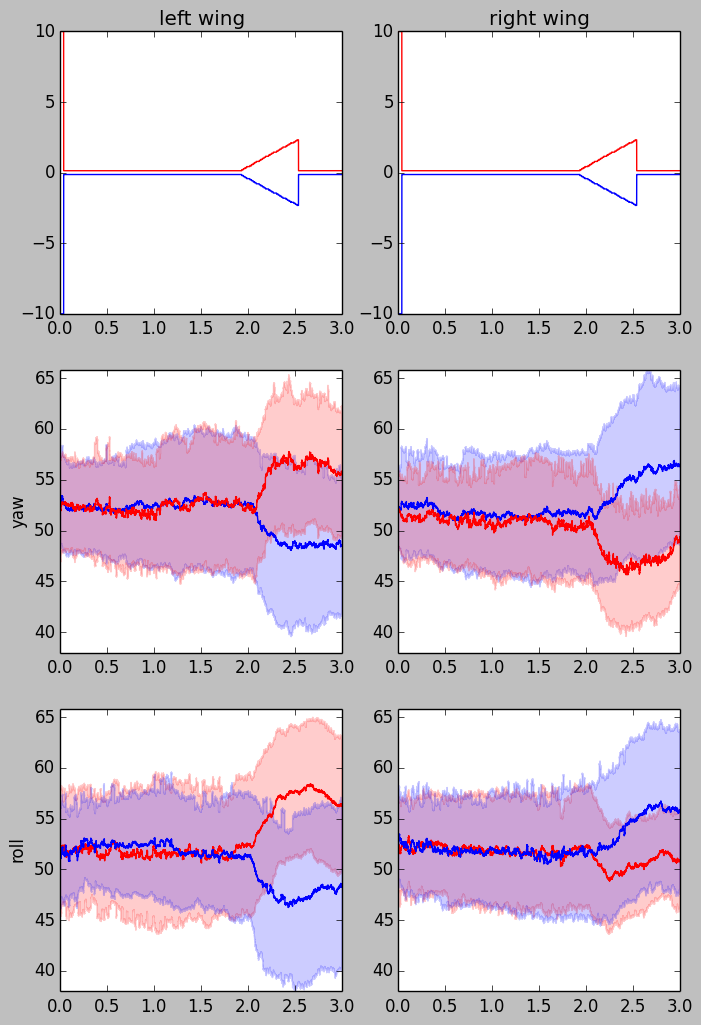

In [12]:
figure(figsize = (8,12))
exp = fly.experiments['img_pattern_test_t2_lightoff']
sequences = exp.exp_record['sequences'].values()
ep0 = np.array(sequences[0]['epoch'])
times = np.array(exp.exp_record['axon_data']['times'])[ep0]
times -= times[0]
dt = times[1]
num_samples = around(3.0/dt) # 3 sec of data
ep_start = np.array(sequences[0]['epoch'])[0]
ep_slice = slice(ep_start,ep_start+num_samples)
stim = np.array(exp.exp_record['axon_data']['Ypos'])[ep_slice]

t = linspace(0,3,3*100*1000)[::10]
def plot_sig(sig,c):
    x = rad2deg(np.array(sig)/5)
    m = mean(x,axis = 0)[::10]
    sd = std(x,axis = 0)[::10]
    fill_between(t,m-sd,m+sd,color = c,alpha = 0.2)
    plot(t,m,c)[::10]
    #gca().set_xbound(0,2.5)

ax1 = subplot(3,2,1)    
plot(t,stim[::10],'r')
plot(t,stim[::10]*-1,'b')
gca().set_title('left wing')
subplot(3,2,2,sharey = ax1)    
plot(t,stim[::10],'r')
plot(t,stim[::10]*-1,'b')
gca().set_title('right wing')

ax2 = subplot(3,2,3)
sig = group_dict_means['yaw_90_left']
plot_sig(sig,'b')
sig = group_dict_means['yaw_270_left']
plot_sig(sig,'r')
gca().set_ylabel('yaw')

subplot(3,2,4,sharey = ax2)
sig = group_dict_means['yaw_90_right']
plot_sig(sig,'b')
sig = group_dict_means['yaw_270_right']
plot_sig(sig,'r')

subplot(3,2,5,sharey = ax2)
sig = group_dict_means['roll_90_left']
plot_sig(sig,'r')
sig = group_dict_means['roll_270_left']
plot_sig(sig,'b')
gca().set_ylabel('roll')

subplot(3,2,6,sharey = ax2)
sig = group_dict_means['roll_90_right']
plot_sig(sig,'r')
sig = group_dict_means['roll_270_right']
plot_sig(sig,'b')
axis('tight')
display(gcf());close()

In [11]:
fly_db.close()

<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5

In [42]:
import gc
gc.collect()

9

In [41]:
del(rdict)

In [9]:
fly = swarm.flies[3]
exp = fly.experiments['img_pattern_test_t2_lightoff']
sequences = exp.exp_record['sequences'].values()
sig = np.array(exp.exp_record['axon_data']['Ph1'])
#get some global stuff
ep0 = np.array(sequences[0]['epoch'])
times = np.array(exp.exp_record['axon_data']['times'])[ep0]
times -= times[0]
dt = times[1]

300000.0